/tmp/ipykernel_2404490/224129638.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Array', y='Character Error Rate (%)', estimator='mean', data=df, palette=flatui)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


          Array  Character Error Rate (%)
0     Only\nv6d                        46
1     Only\nv6d                        37
2     Only\nv6d                        54
3     Only\nv6d                        47
4     Only\nv6d                        48
..          ...                       ...
295  Only\nRl6d                         7
296  Only\nRl6d                        16
297  Only\nRl6d                         7
298  Only\nRl6d                        12
299  Only\nRl6d                         8

[300 rows x 2 columns]


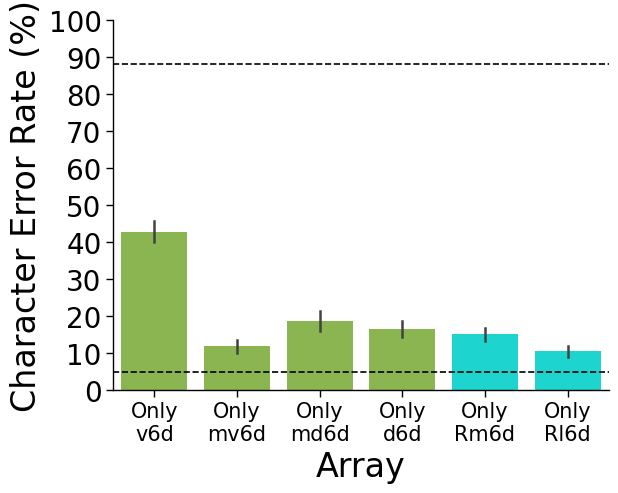

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway


data_frame = []
all_channel_ranges = {#(0,384):'All', # All channels
                      (64, 128):'Only\nv6d', (0, 64):'Only\nmv6d', (192, 256):'Only\nmd6d', (128, 192):'Only\nd6d', 
                        (320, 384):'Only\nRm6d', (256, 320):'Only\nRl6d'}
                         # Each array
                      #(0,256):'Left', (256, 384):'Right'} # Each hemisphere

sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":24, 'legend.fontsize': 17, 'lines.markersize':9})   


for channel_range in all_channel_ranges.keys():
    raw_cers = np.load('T18Train-' + str(channel_range[0]) + '-' + str(channel_range[1]) +'-RawCERs.npy')
    for trial in range(raw_cers.shape[0]):
        max_one = min(1.0, raw_cers[trial])
        data_frame.append([all_channel_ranges[channel_range], int(max_one*100)])


df = pd.DataFrame(data_frame, columns=['Array', 'Character Error Rate (%)'])
print(df)
flatui = ['#8CC63F','#8CC63F','#8CC63F','#8CC63F', '#00F2EB','#00F2EB']
sns.set_palette(flatui)
g = sns.barplot(x='Array', y='Character Error Rate (%)', estimator='mean', data=df, palette=flatui)
sns.despine()
plt.gca().legend().set_title('')
plt.legend(frameon=False)
plt.xticks(fontsize=15)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontsize=20)
plt.ylim(0, 100) 


plt.axhline(y=4.9, color='k', linestyle='--')
plt.axhline(y=88, color='k', linestyle='--')
plt.savefig('ArraybyArrayContribution.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_2404490/3486337535.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Hemisphere', y='Character Error Rate (%)', estimator='mean', data=df, palette=flatui)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         Hemisphere  Character Error Rate (%)
0    Left\n4 arrays                         3
1    Left\n4 arrays                         5
2    Left\n4 arrays                        18
3    Left\n4 arrays                        10
4    Left\n4 arrays                         0
..              ...                       ...
95  Right\n2 arrays                         3
96  Right\n2 arrays                        13
97  Right\n2 arrays                         3
98  Right\n2 arrays                         9
99  Right\n2 arrays                         2

[100 rows x 2 columns]


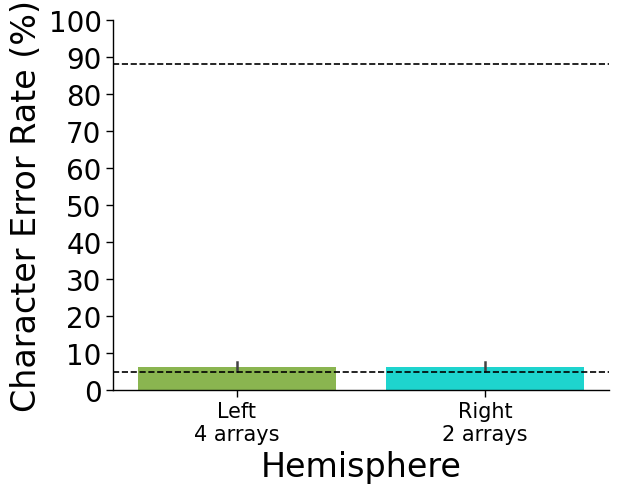

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway


data_frame = []
all_channel_ranges = {#(0,384):'All', # All channels
                      (0, 256):'Left\n4 arrays', (256, 384):'Right\n2 arrays'}
                         # Each array
                      #(0,256):'Left', (256, 384):'Right'} # Each hemisphere

sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":24, 'legend.fontsize': 17, 'lines.markersize':9})   


for channel_range in all_channel_ranges.keys():
    raw_cers = np.load('T18Train-' + str(channel_range[0]) + '-' + str(channel_range[1]) +'-RawCERs.npy')
    for trial in range(raw_cers.shape[0]):
        max_one = min(1.0, raw_cers[trial])
        data_frame.append([all_channel_ranges[channel_range], int(max_one*100)])


df = pd.DataFrame(data_frame, columns=['Hemisphere', 'Character Error Rate (%)'])
print(df)
flatui = ['#8CC63F','#00F2EB']
sns.set_palette(flatui)
g = sns.barplot(x='Hemisphere', y='Character Error Rate (%)', estimator='mean', data=df, palette=flatui)
sns.despine()
plt.gca().legend().set_title('')
plt.legend(frameon=False)
plt.xticks(fontsize=15)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontsize=20)
plt.ylim(0, 100) 


plt.axhline(y=4.9, color='k', linestyle='--')
plt.axhline(y=88, color='k', linestyle='--')
plt.savefig('HemisphereContribution.pdf', bbox_inches='tight')
plt.show()